'''
There are many individual genes of interest.

We compare here.
'''

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
colorset = ['#763C87','#1FA2F4','#0569CE','#F48C36','#E54028']
greens = ['#37535e', '#3b748a', '#4095b5', '#52aec9', '#72bfc4', '#93d0bf']

mpl.rcParams.update({
'backend': 'MacOSX',
'text.usetex': 'false',
'font.family': 'Myriad Pro',
'font.size': 18, 
'figure.subplot.hspace': .4,
'figure.subplot.bottom': 0.125, 
'savefig.dpi': 600,
'savefig.format': 'pdf', 
'pdf.fonttype': 42,
'figure.edgecolor': (1, 1, 1, 0), 
'figure.facecolor': (1, 1, 1, 0), 
'figure.figsize': (15.0, 10.0),
'font.weight': 'bold',
'axes.labelweight': 'bold',
'axes.titlesize': 36,
'lines.markersize': 11.200000000000001,
 'ytick.major.width': 1.6,
 'xtick.major.width': 1.6,
 'lines.markeredgewidth': 0.0,
 'xtick.major.pad': 11.200000000000001,
 'ytick.minor.width': 0.8,
 'grid.linewidth': 1.6,
 'lines.linewidth': 2.8000000000000003,
 'ytick.major.pad': 11.200000000000001,
})

In [4]:
filename = '../data/sorted/rpkm.txt'
data = pd.io.parsers.read_csv(filename, 
                                    sep='\t', 
                                    header=0)
data.columns

Index(['Transcript/RepeatID (cmd=analyzeRepeats.pl rna mm10 -strand both -count exons -d Tcell-CD69neg-K99A10-22h-ES Tcell-CD69neg-nopept-22h-ES Tcell-CD69neg-PCC01-22h-ES Tcell-CD69neg-PCC1-22h-ES Tcell-CD69pos-K99A100-22h-ES Tcell-CD69pos-K99A10-22h-ES Tcell-CD69pos-PCC01-22h-ES Tcell-CD69pos-PCC1-22h-ES -rpkm -condenseGenes)',
       'chr', 'start', 'end', 'strand', 'Length', 'Copies',
       'Annotation/Divergence', 'Tcell-CD69neg-K99A10-22h-ES FPKM',
       'Tcell-CD69neg-nopept-22h-ES FPKM', 'Tcell-CD69neg-PCC01-22h-ES FPKM',
       'Tcell-CD69neg-PCC1-22h-ES FPKM', 'Tcell-CD69pos-K99A100-22h-ES FPKM',
       'Tcell-CD69pos-K99A10-22h-ES FPKM', 'Tcell-CD69pos-PCC01-22h-ES FPKM',
       'Tcell-CD69pos-PCC1-22h-ES FPKM'],
      dtype='object')

In [5]:
cols = [
'Tcell-CD69neg-nopept-22h-ES FPKM',
'Tcell-CD69neg-K99A10-22h-ES FPKM',
'Tcell-CD69neg-PCC01-22h-ES FPKM',
'Tcell-CD69neg-PCC1-22h-ES FPKM',
'Tcell-CD69pos-K99A10-22h-ES FPKM',
'Tcell-CD69pos-K99A100-22h-ES FPKM',
'Tcell-CD69pos-PCC01-22h-ES FPKM',
'Tcell-CD69pos-PCC1-22h-ES FPKM']
print(data.shape)
labels = ['CD69- No Peptide',
          'CD69- 10uM K99A', 
          'CD69- 0.1uM PCC', 
          'CD69- 1uM PCC',
          'CD69+ 10uM K99A', 
          'CD69+ 100uM K99A', 
          'CD69+ 0.1uM PCC', 
          'CD69+ 1uM PCC']


(24453, 16)


In [9]:
# Extract the genes we care about.
genes = ('Tcf7', 'Tbx21', 'Ccl5', 'Ccr7', 
         'Il7r', 'Sell',  'Nr4a3', 
         'Ly6c1', 'Ly6c2', 
         'Ctla4', 'Pdcd1', 'Icos', 'Map1lc3b',
         # PC1
         'Stat1', 'Stat5a', 'Il2ra', 'Nfkb1', 'Nfkb2',
         'Nr4a1', 'Nr4a2', 'Irf1', 'Irf8', 'Irf4', 
         'Ly6a', 'Il2', 'Ccl22', 'Tnf', 'Ifng',
         'Lta', 'Tnfsf11', 'Tnfsf8', 'Il17a',
         'Cd6', 'Cd69', 'Cd4',
         
         # PC2
         'Cd83', 'Gata3', 'Ikzf2', 'Lmna', 'Swap70', 
         'Kit', 'Adcy6', 'Anxa6', 'Tspan13', 'Gpr183', 
         'Lad1', 'Hcls1', 'Ccl4', 'Cd5', 'Rgs16', 'Nr4a2', 
         'Cd40lg', 'Iigp1', 'Spry1', 'Il13', 'Ccl3',
         # Comparison
         'Il4', 'Foxp3', 'Nrp1',
         # Molecular chaperone
         'Hsph1', 'Canx', 'Cct2', 'Cct3',
         # Protein biosynthesis
         'Etf1', 'Eif6', 'Eif3a', 'Eif3b', 'Eef1e1')


/Applications/anaconda/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


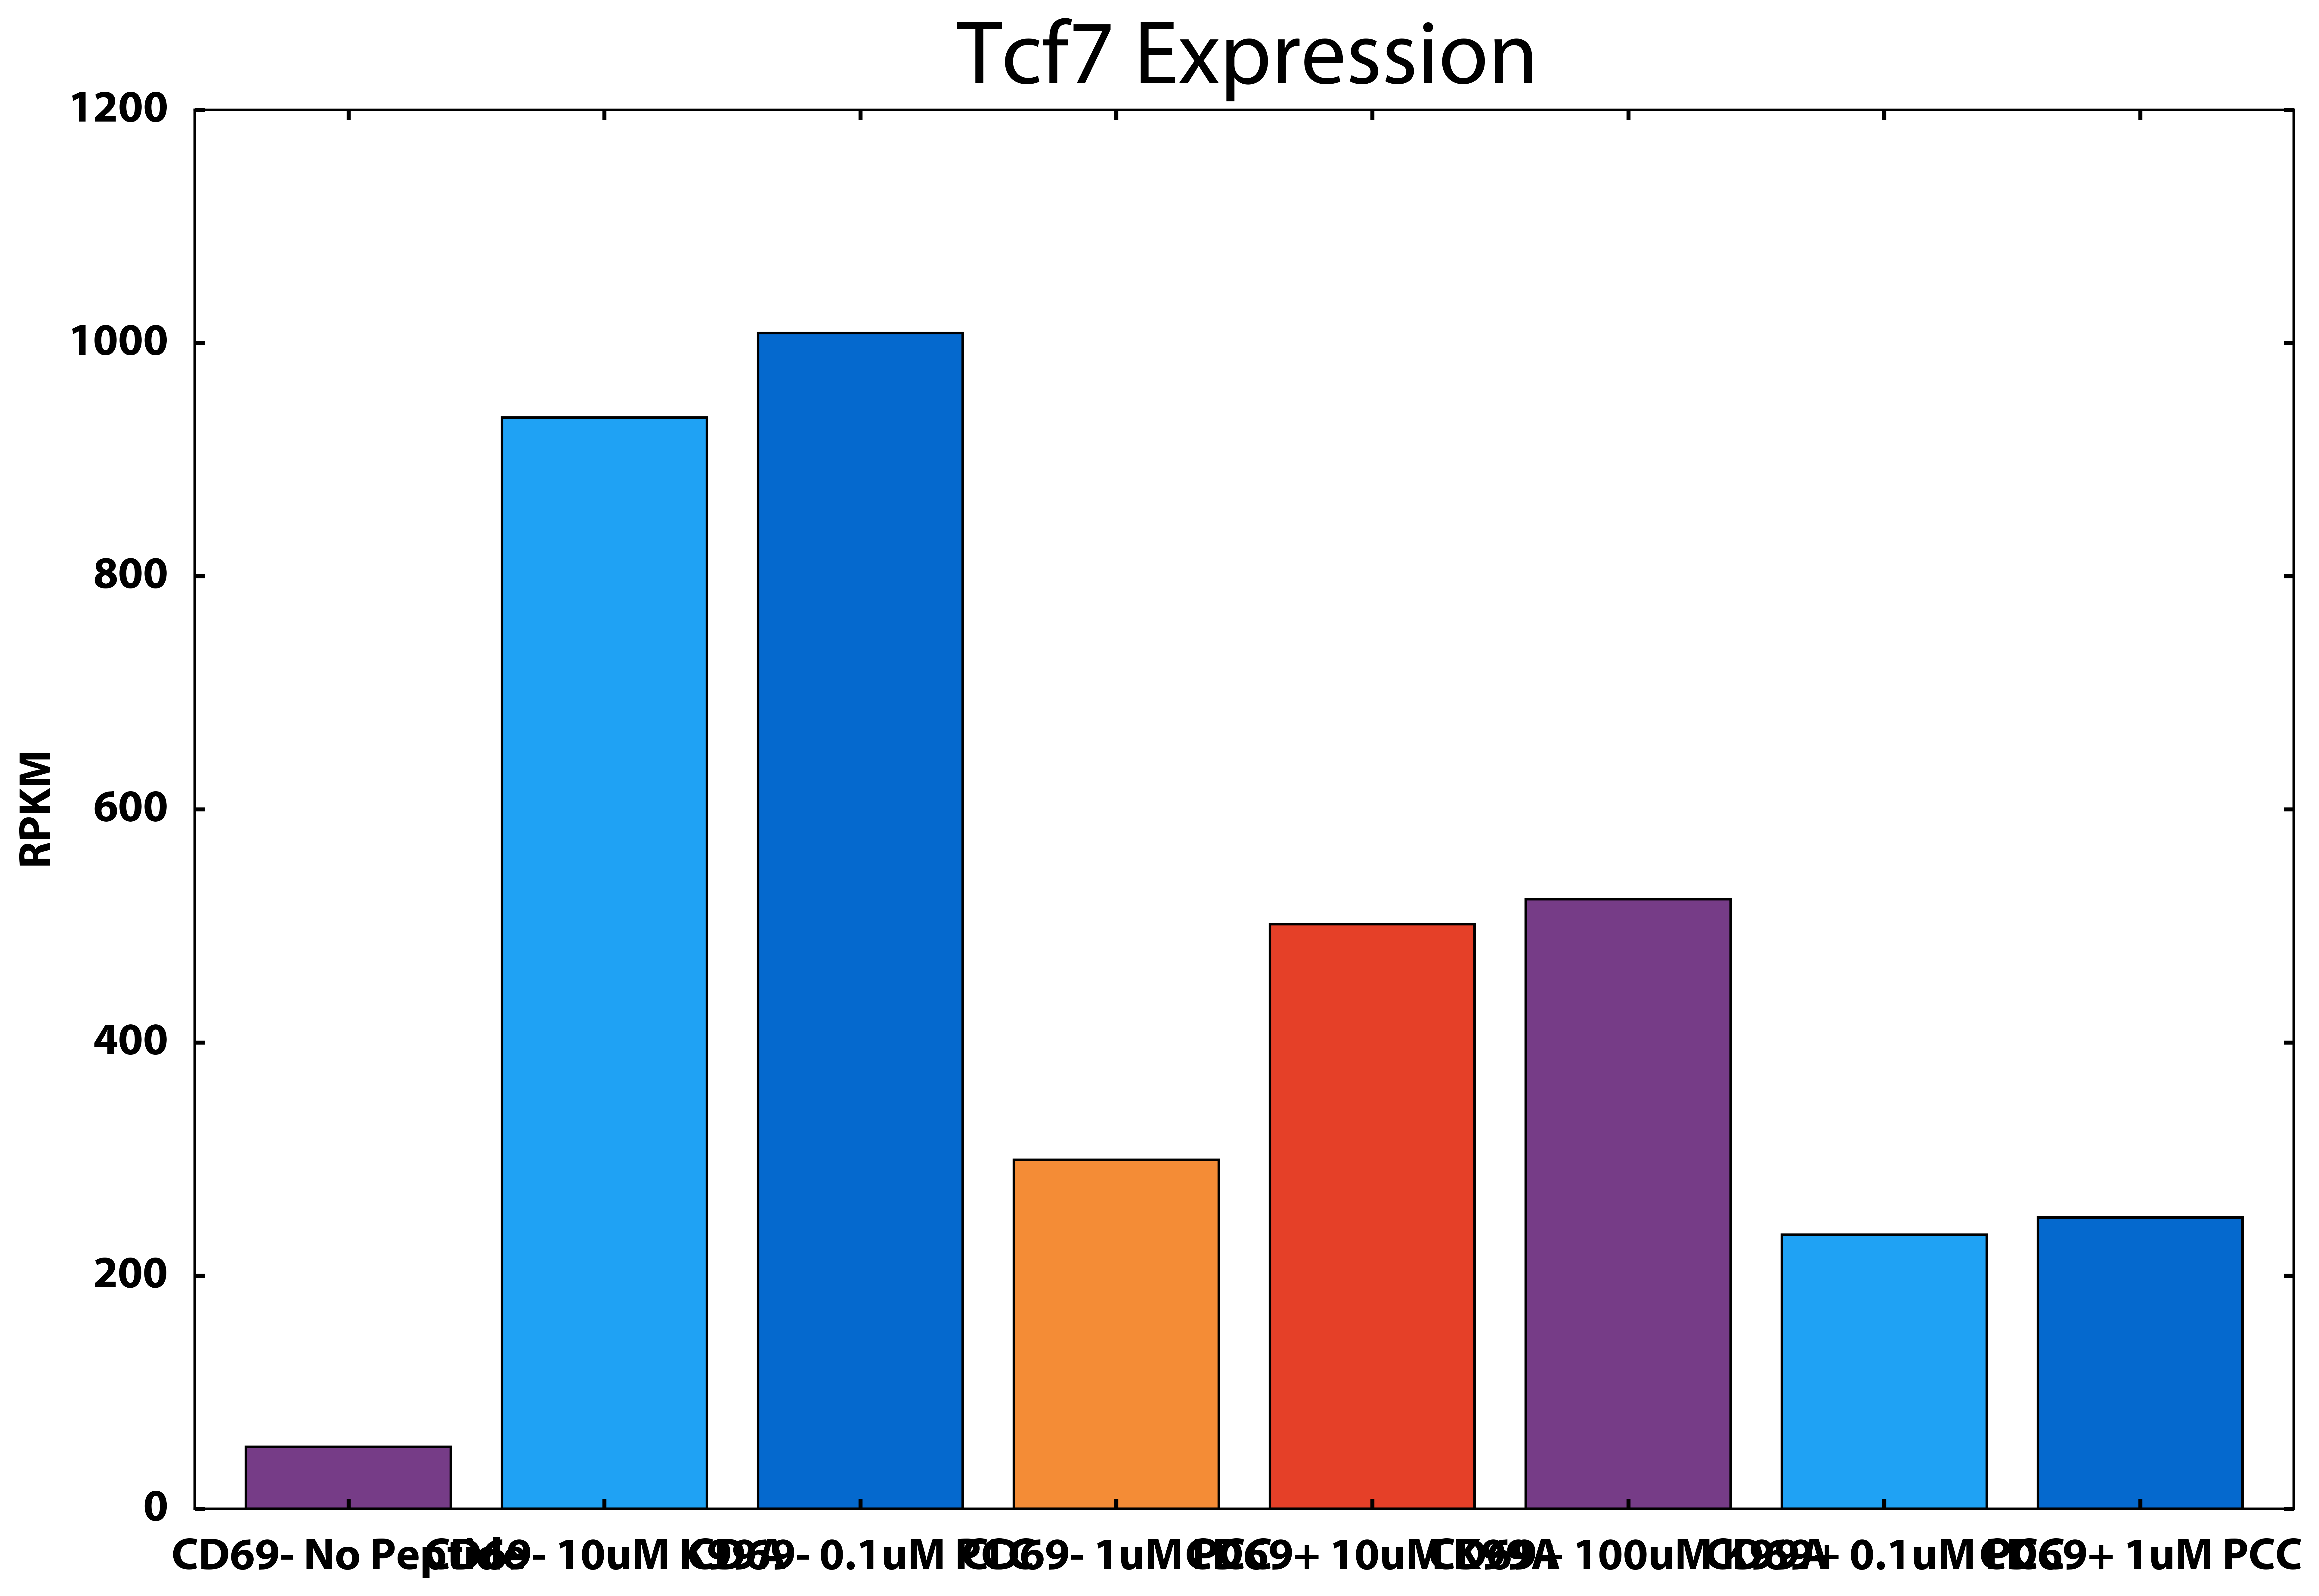

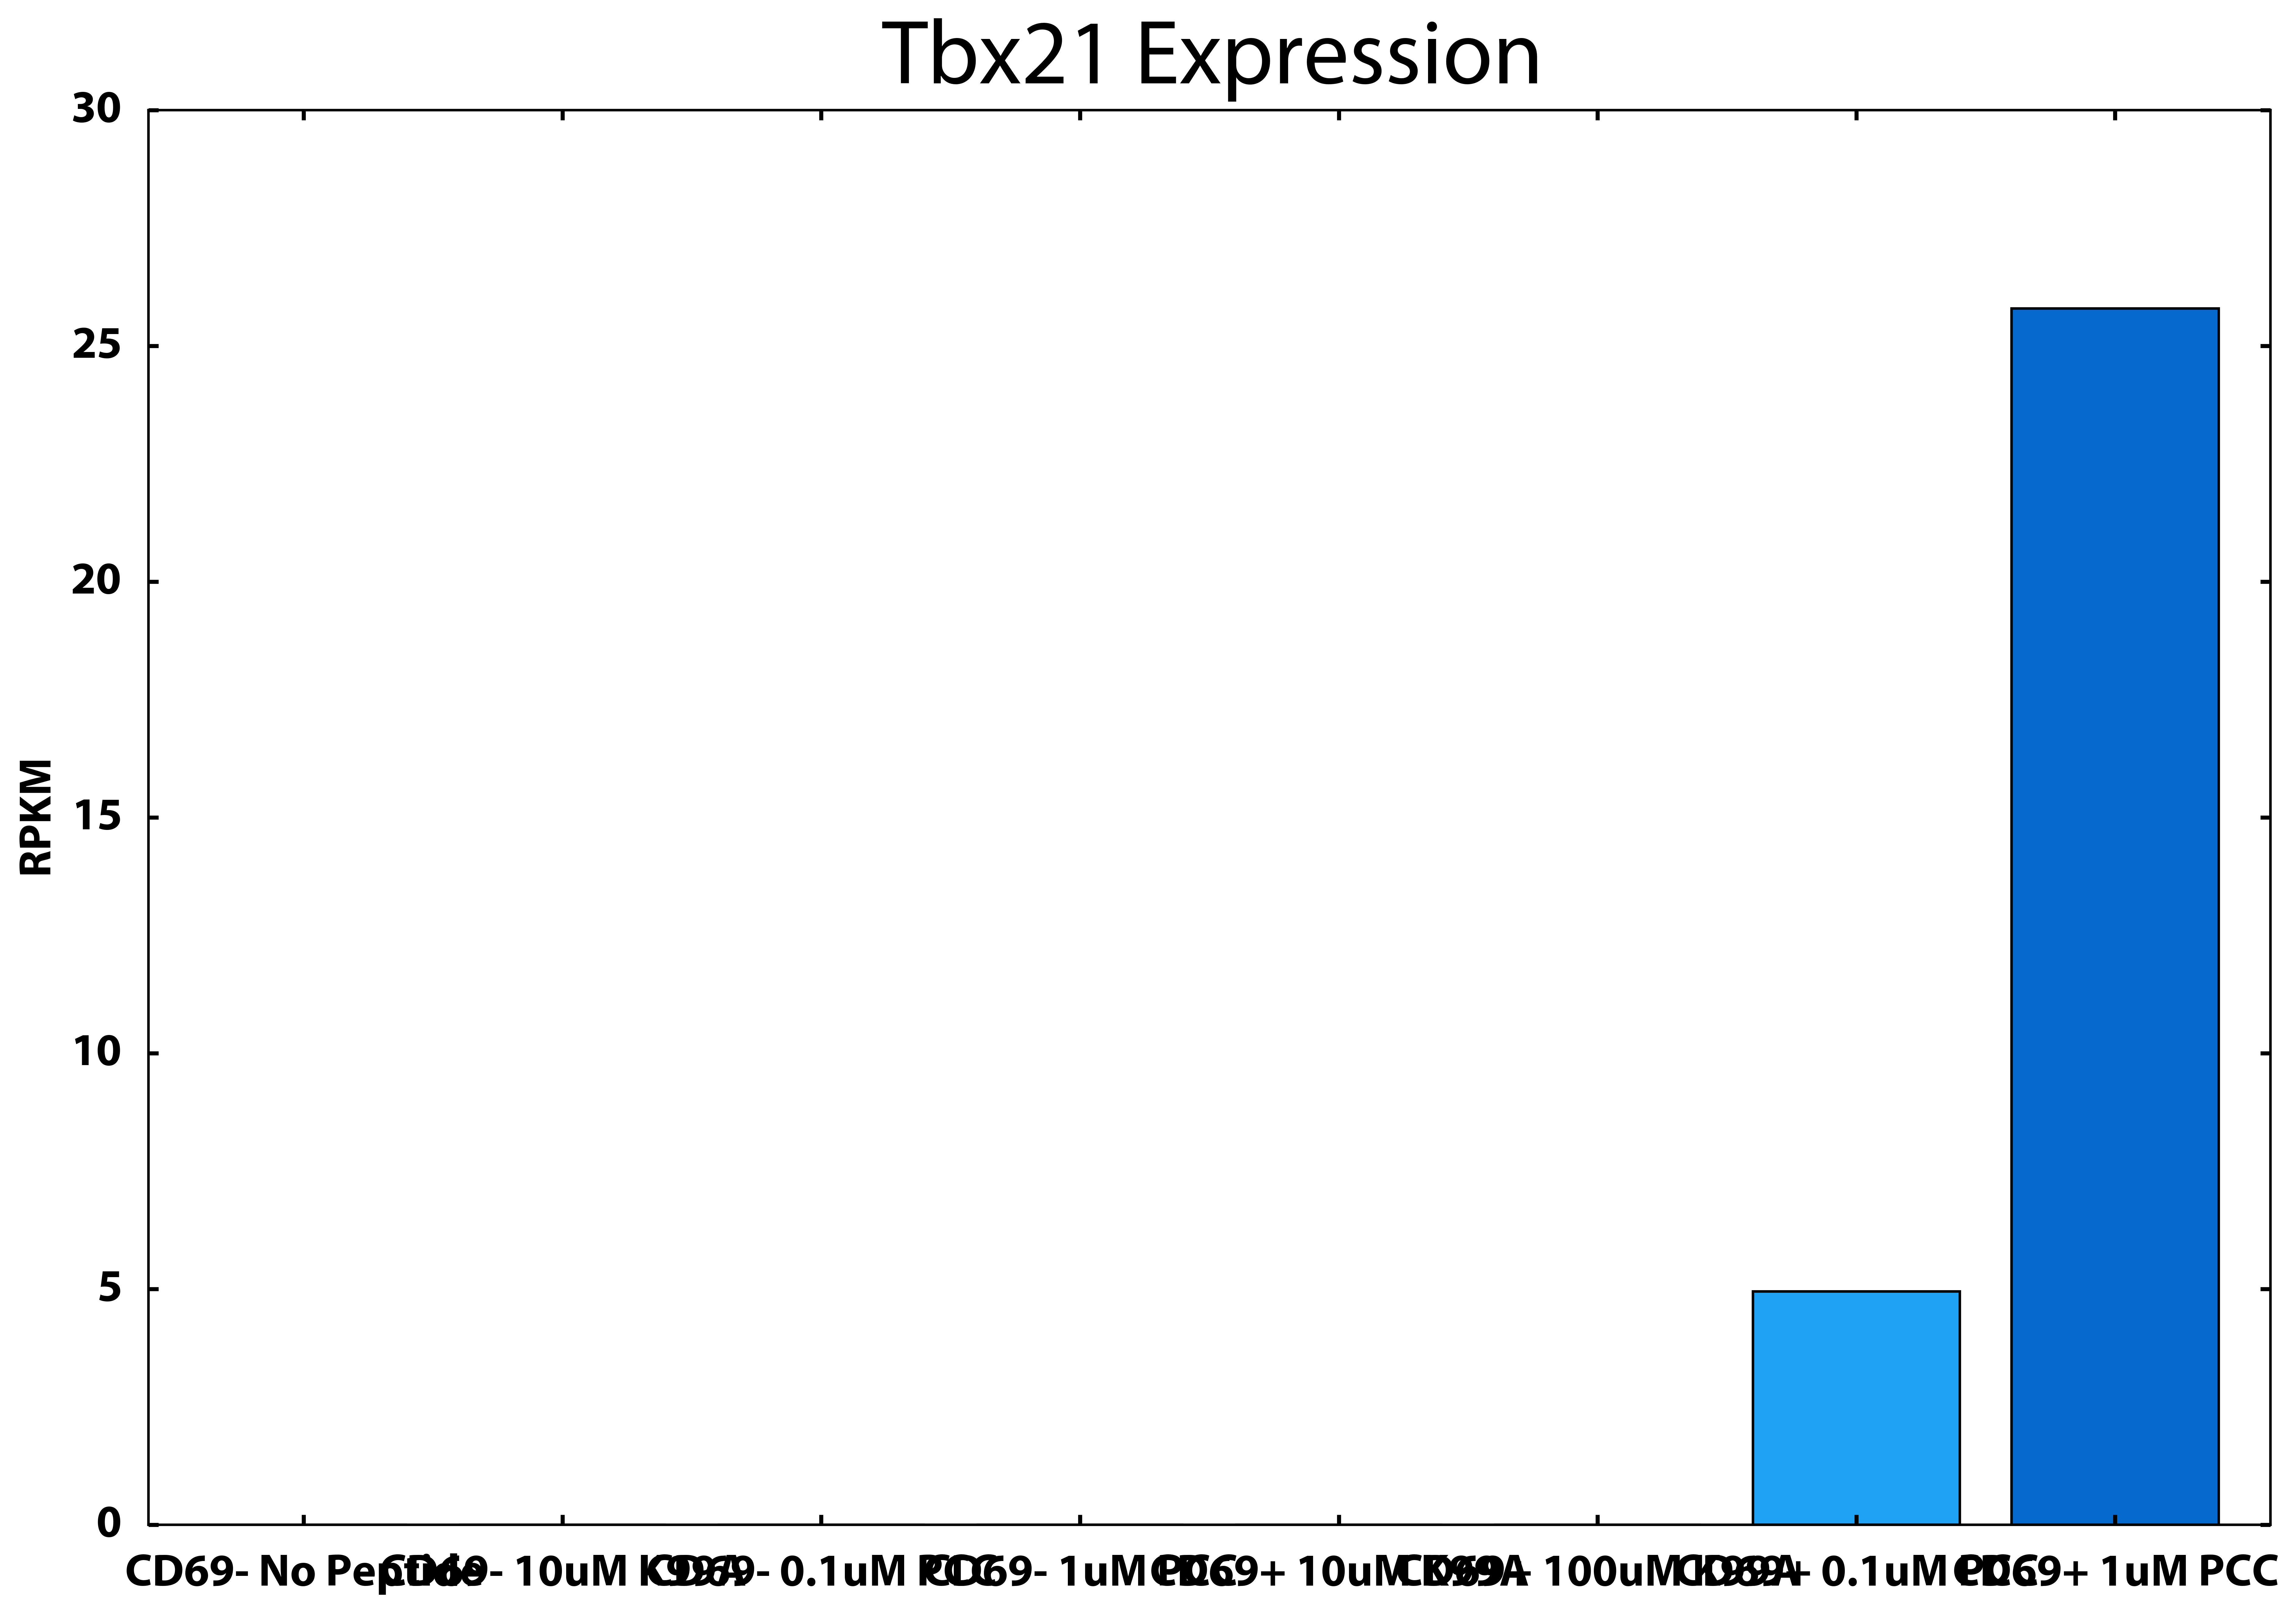

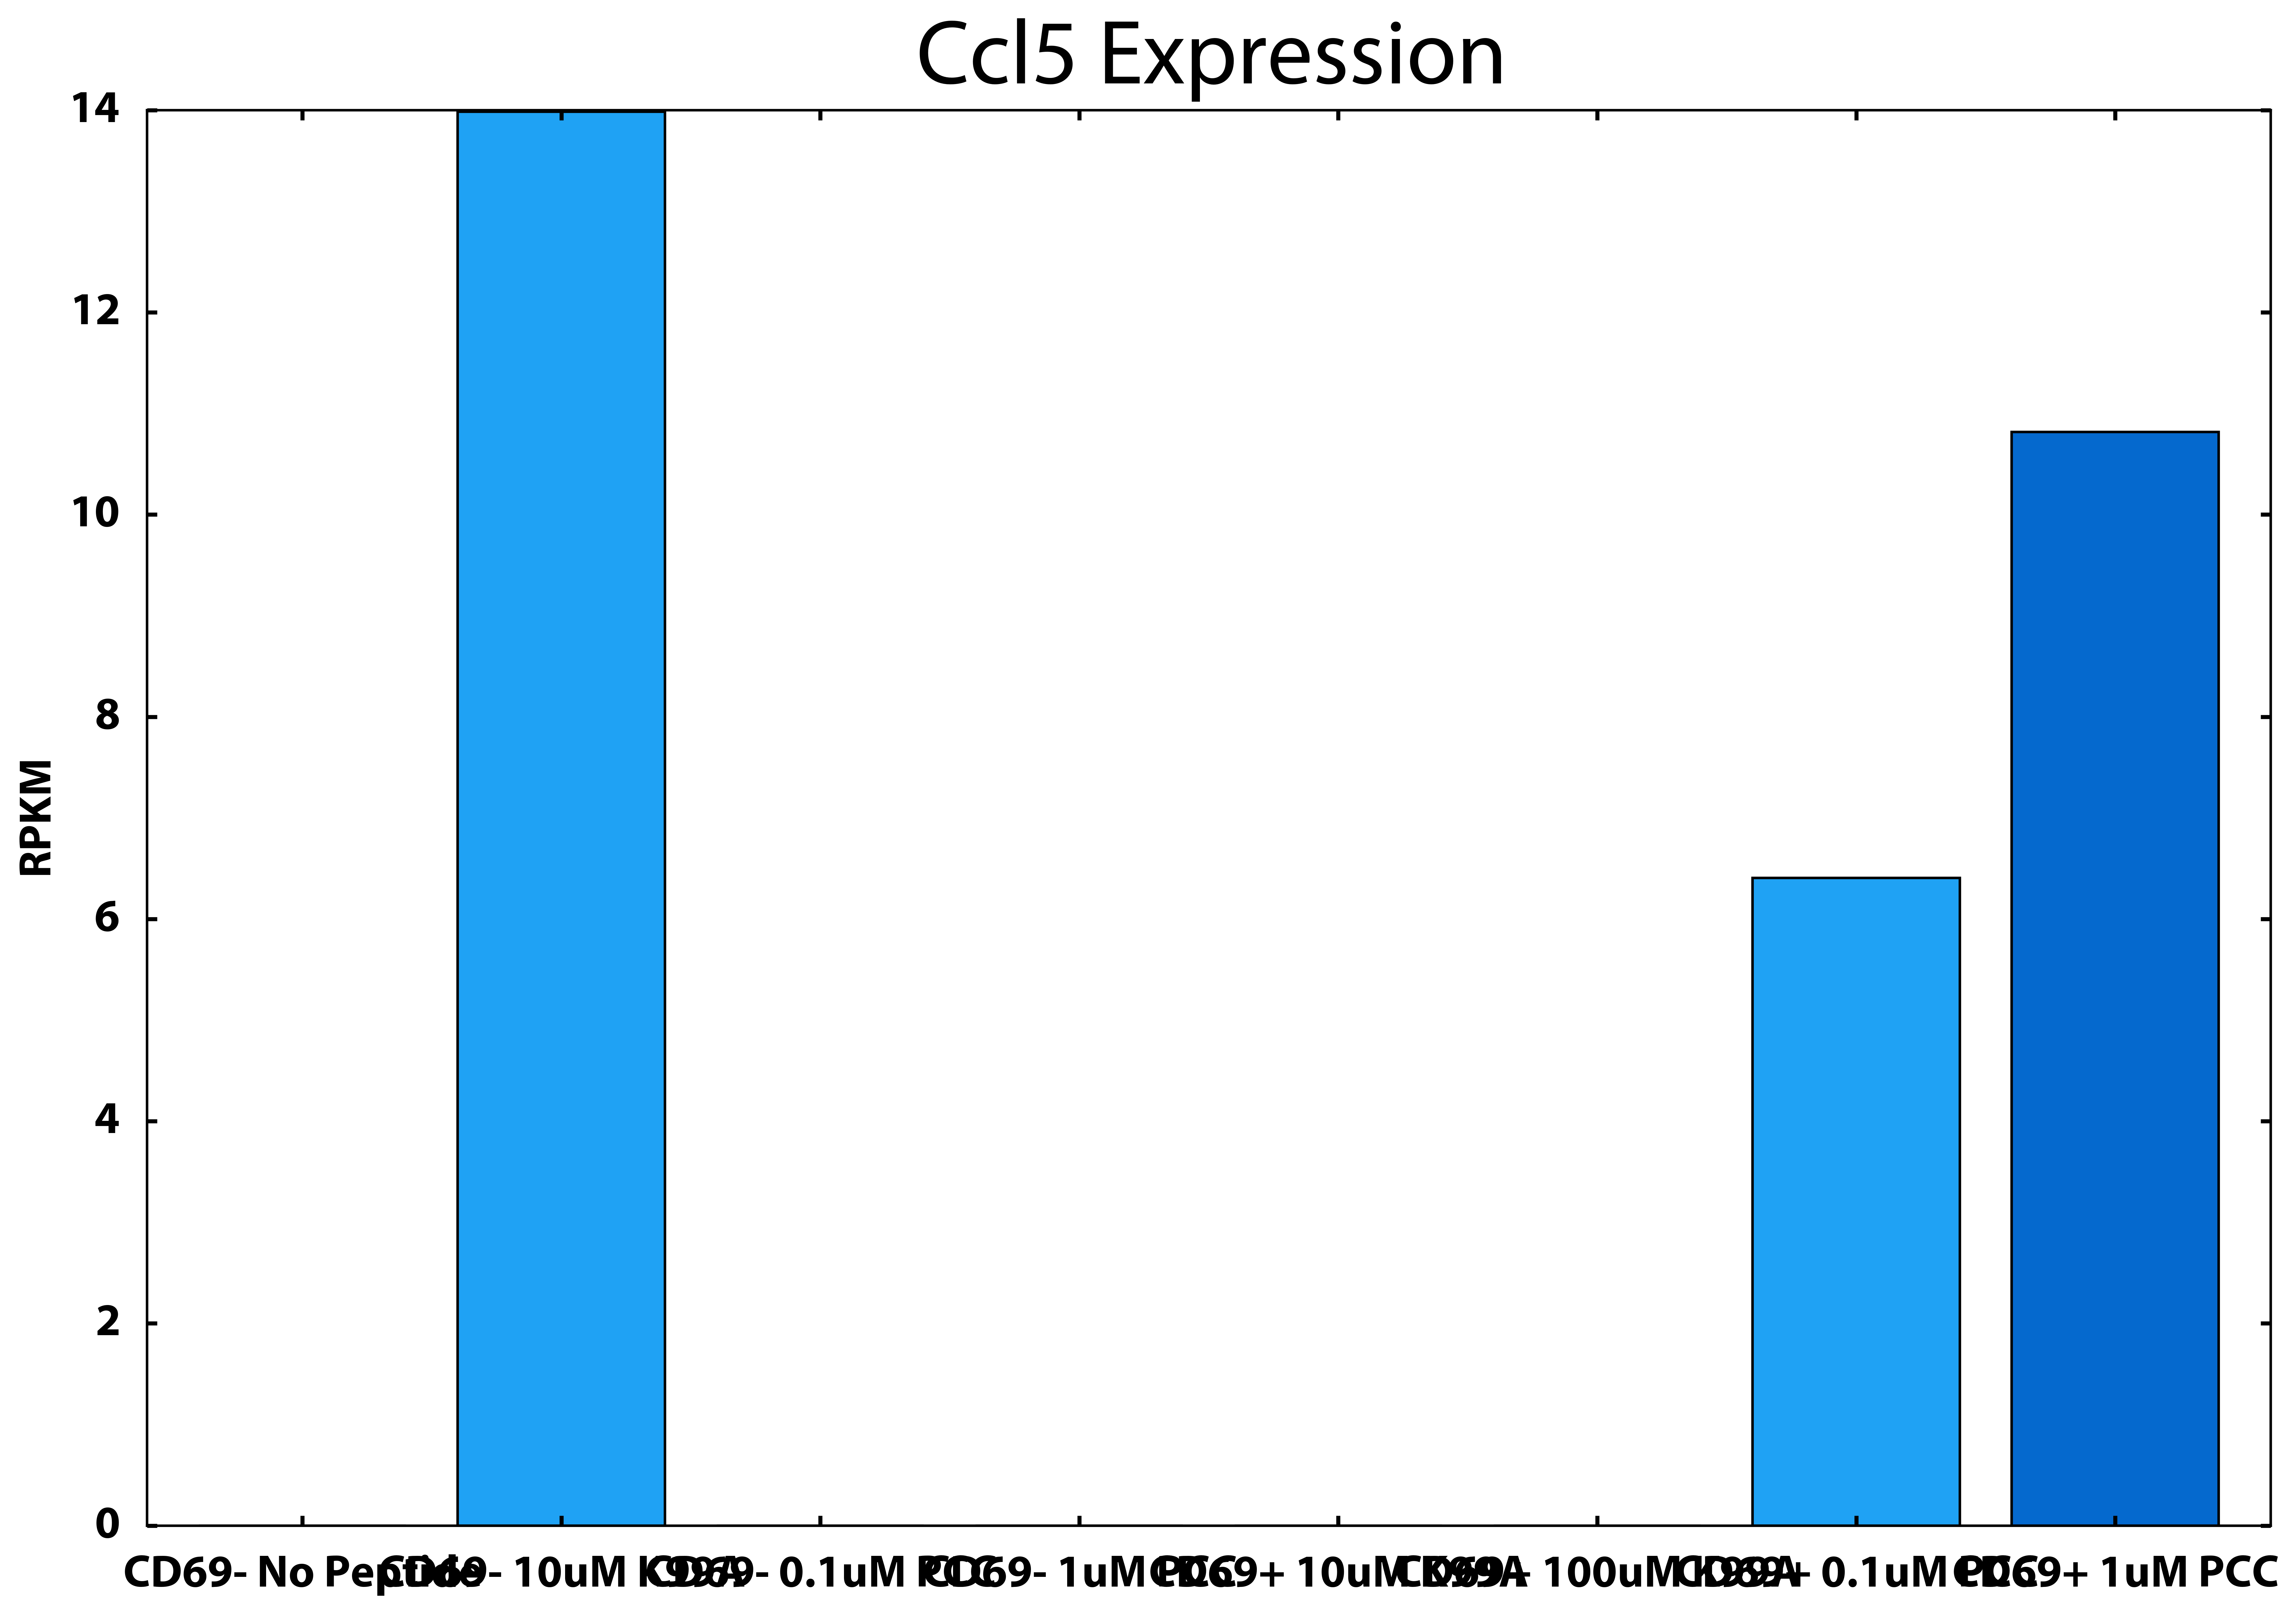

In [ ]:
for gene in genes:
    try: 
        idx = data[data['Annotation/Divergence'].str.startswith(gene + '|')].index[0]
    except IndexError:
        print('Could not find gene: ' + gene)
        
    gene_data = data.loc[idx]
    
    plt.figure()
    x_range = range(0, len(cols))
    
    # Error bars
    means = gene_data[cols]
    plt.bar([x + .2 for x in x_range], means, color=colorset)
    
    plt.xticks([x + .6 for x in x_range], labels)
    plt.title(gene + ' Expression', y=1.01)
    plt.ylabel('RPKM')

    # Set y axis minimum, not max
    plt.ylim(0, plt.ylim()[1])
    plt.xlim([0, len(labels) + .2])

    #plt.savefig('figures/{}_Expression'.format(gene),
    #        bbox_inches='tight')
    #plt.cla()

In [8]:
from scipy.stats import ttest_ind
import numpy as np

for gene in genes:
    try: 
        idx = data[data['Annotation/Divergence'].str.startswith(gene + '|')].index[0]
    except IndexError:
        print('Could not find gene: ' + gene)
        
    gene_data = data.loc[idx]
    
    # Pairwise T test
    # We want to make a table of p-vals so that we can create a chart.
    all_p = []
    for i, col in enumerate(cols):
        col_p = []
        for j, other in enumerate(cols):
            if j > i:
                t, p = ttest_ind(gene_data[[col + '-1', col + '-2']], 
                                   gene_data[[other + '-1', other + '-2']])
                col_p.append(p)
            else: col_p.append(1)
        all_p.append(col_p)

    p_vals = pd.DataFrame(all_p, columns=labels, index=labels)
    p_vals.to_csv('pvals/{}_p-value_matrix.txt'.format(gene), sep='\t',
                  header=True, index=True)

    '''
    fig, ax = plt.subplots(figsize=[12,12])
    ax.set_frame_on(False)

    imgplot = plt.imshow(p_vals, interpolation='nearest', cmap='gray')
    imgplot.set_clim(0, .1)
    plt.colorbar(imgplot, fraction=0.045, pad=.01)

    count = len(labels)
    for i, label in enumerate(labels):
        if i != 0:
            # x-axis
            plt.text(i, i - .3, label, ha='center', fontweight='bold')
        if i != count-1:
            # y-axis
            plt.text(i +.3, i, label, rotation=90, va='center', fontweight='bold')
    plt.xticks([])
    plt.yticks([])

    # Draw in triangular grid:
    for x in range(count-1):
        plt.plot([x + .5, x + .5], [-.5, x + .5], color='black')
        plt.plot([x + .5, count - .5], [x + .5, x + .5], color='black')
    plt.plot([.5, count - .5], [-.5, -.5], color='black')
    plt.plot([count - .5, count - .5], [-.5, count - 1.5], color='black')

    plt.xlim([.4, 4.6])
    plt.ylim([3.6, -.6])

    plt.savefig('figures/{}_p-values'.format(gene),
                bbox_inches='tight')
    
    '''